In [1]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import matplotlib.pyplot as plt
import mplhep as hep
import awkward as ak
import numpy as np
import uproot
import hist

NanoAODSchema.warn_missing_crossrefs = False
hep.style.use("CMS")

In [12]:
def ChargeOrdering(DATA):
    ''' Sorts charge from from each event. '''
    index = ak.argsort(DATA.charge)
    return DATA[index]

def ElectronSelection(DATA, PT, ETA):
    ''' Event selection: electron antielectron pair, electron.pt > PT, electron.eta > ETA,
    ensures charge conservation and allows for 2 or 4 lepton pairs. '''
    x = DATA.Electron
    mask_pT_eta = ak.all(x.pt > PT, axis=-1) & ak.all(x.eta > ETA, axis=-1)
    x = x[mask_pT_eta]
    mask_charge = ak.sum(x.charge, axis=-1) == 0
    mask_2e = ak.num(x, axis=-1) == 2
    mask_4e = ak.num(x, axis=-1) == 4
    mask = mask_charge & (mask_2e | mask_4e)
    return x[mask]

In [2]:
fname = "root://eospublic.cern.ch//eos/opendata/cms/derived-data/AOD2NanoAODOutreachTool/ForHiggsTo4Leptons/Run2012B_DoubleElectron.root"

In [13]:
events = NanoEventsFactory.from_root(
    fname, schemaclass=NanoAODSchema.v6, entry_stop=50000
).events()

In [14]:
h1 = hist.Hist(hist.axis.Regular(500, 0, 180, name="Invariant Mass[GeV/C^2]"))
selected_events = ElectronSelection(events, 30, 0)
zCandidates = selected_events[:, 0].add(selected_events[:, 1])
h1.fill(zCandidates.mass);

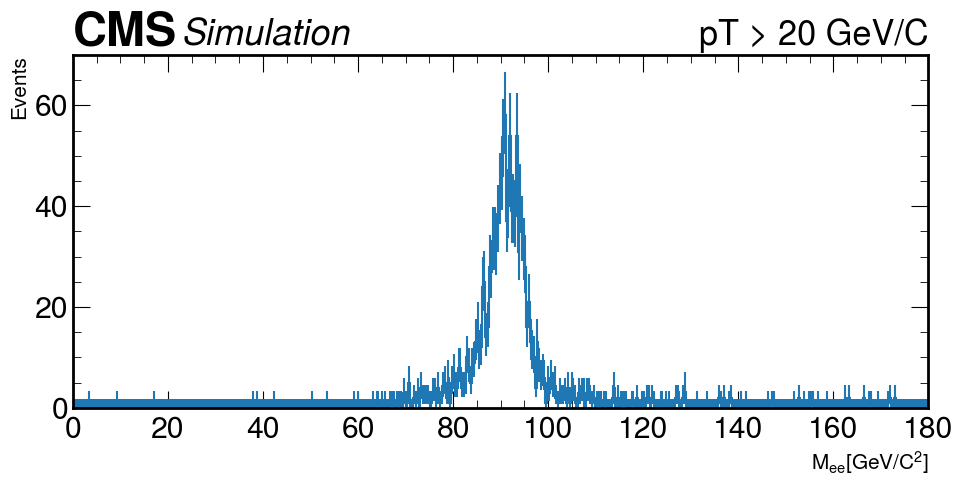

In [15]:
f, ax = plt.subplots(figsize=(10, 5))
# hep.histplot(h1, bins, label=r'Z $\rightarrow$ 2e')
hep.histplot(h1)
ax.set_xlim(0, 180)
ax.set_ylabel("Events", fontsize=15)
ax.set_xlabel("$M_{ee} [GeV/C^{2}]$", fontsize=15)
# plt.legend(fontsize=15)
plt.tight_layout()
hep.cms.label(rlabel="pT > 20 GeV/C")
plt.savefig("pt20.jpg")
plt.show()

Need to reconstruct zz to 4e

In [ ]:
# h2,bins  = np.histogram((fourleptons[:,0] + fourleptons[:,1]).mass,bins = 1000)
# f,ax = plt.subplots(figsize=(8,4))
# ax.set_title('pT > 20 GeV/C', fontsize=18)
# hep.histplot(h2, bins, label='ZZ->eeee')
# ax.set_xlim(0, 150)
# ax.set_ylabel('Events')
# ax.set_xlabel('[GeV]')
# plt.legend()
# plt.show()